## Γραμμική και Πολυωνυμική Παλινδρόμηση για Τιμολόγηση Κολοκύθας - Μάθημα 3

Φορτώστε τις απαραίτητες βιβλιοθήκες και το σύνολο δεδομένων. Μετατρέψτε τα δεδομένα σε ένα dataframe που περιέχει ένα υποσύνολο των δεδομένων:

- Επιλέξτε μόνο κολοκύθες που τιμολογούνται ανά bushel
- Μετατρέψτε την ημερομηνία σε μήνα
- Υπολογίστε την τιμή ως μέσο όρο των υψηλών και χαμηλών τιμών
- Μετατρέψτε την τιμή ώστε να αντικατοπτρίζει την τιμολόγηση ανά ποσότητα bushel


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [168]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month  DayOfYear   Variety       City               Package  Low Price  \
70      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
71      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
72     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
73     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
74     10        281  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

    High Price      Price  
70        15.0  13.636364  
71        18.0  16.363636  
72        18.0  16.363636  
73        17.0  15.454545  
74        15.0  13.636364

Ένα διάγραμμα διασποράς μας υπενθυμίζει ότι έχουμε δεδομένα μόνο από τον Αύγουστο έως τον Δεκέμβριο. Πιθανώς χρειαζόμαστε περισσότερα δεδομένα για να μπορέσουμε να βγάλουμε συμπεράσματα με γραμμικό τρόπο.


<AxesSubplot:xlabel='Month', ylabel='Price'>

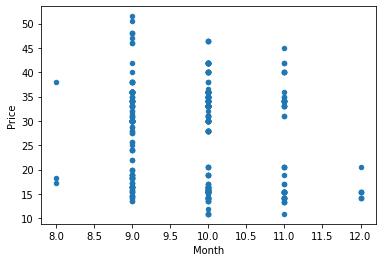

In [169]:
new_pumpkins.plot.scatter('Month','Price')

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

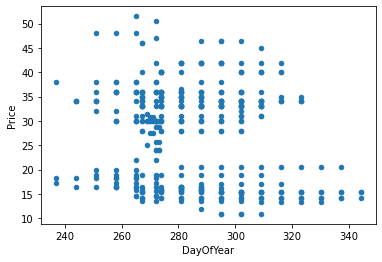

In [170]:
new_pumpkins.plot.scatter('DayOfYear','Price')

In [171]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


Φαίνεται ότι η συσχέτιση είναι αρκετά μικρή, αλλά υπάρχει κάποια άλλη πιο σημαντική σχέση - επειδή οι τιμές στον παραπάνω γράφημα φαίνεται να σχηματίζουν αρκετές διακριτές ομάδες. Ας δημιουργήσουμε ένα γράφημα που θα δείχνει τις διαφορετικές ποικιλίες κολοκύθας:


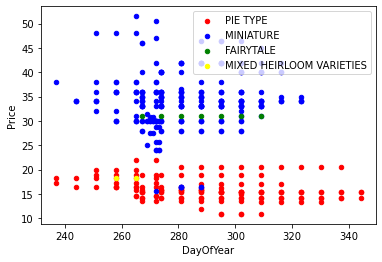

In [172]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

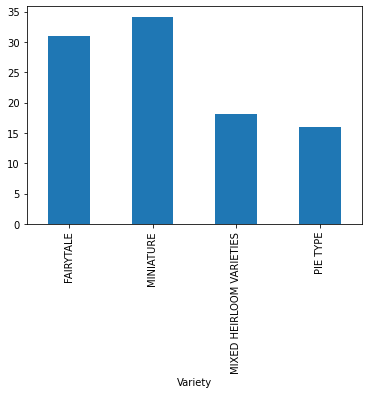

In [173]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.2669192282197318


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

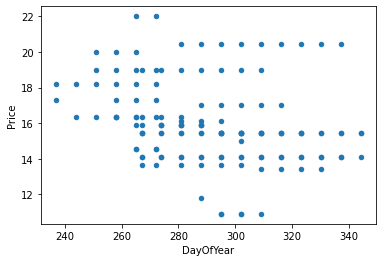

In [174]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

### Γραμμική Παλινδρόμηση

Θα χρησιμοποιήσουμε το Scikit Learn για να εκπαιδεύσουμε ένα μοντέλο γραμμικής παλινδρόμησης:


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 2.77 (17.2%)


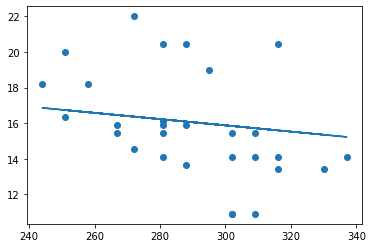

In [177]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

Η κλίση της γραμμής μπορεί να προσδιοριστεί από τους συντελεστές γραμμικής παλινδρόμησης:


In [178]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.01751876]), 21.133734359909326)

Μπορούμε να χρησιμοποιήσουμε το εκπαιδευμένο μοντέλο για να προβλέψουμε την τιμή:


In [179]:
# Pumpkin price on programmer's day

lin_reg.predict([[256]])

array([16.64893156])

### Πολυωνυμική Παλινδρόμηση

Μερικές φορές η σχέση μεταξύ χαρακτηριστικών και αποτελεσμάτων είναι εγγενώς μη γραμμική. Για παράδειγμα, οι τιμές της κολοκύθας μπορεί να είναι υψηλές τον χειμώνα (μήνες=1,2), να πέφτουν το καλοκαίρι (μήνες=5-7) και στη συνέχεια να αυξάνονται ξανά. Η γραμμική παλινδρόμηση δεν μπορεί να βρει αυτή τη σχέση με ακρίβεια.

Σε αυτή την περίπτωση, μπορούμε να εξετάσουμε την προσθήκη επιπλέον χαρακτηριστικών. Ένας απλός τρόπος είναι να χρησιμοποιήσουμε πολυώνυμα από τα χαρακτηριστικά εισόδου, κάτι που θα οδηγήσει σε **πολυωνυμική παλινδρόμηση**. Στο Scikit Learn, μπορούμε να προ-υπολογίσουμε αυτόματα πολυωνυμικά χαρακτηριστικά χρησιμοποιώντας pipelines:


Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280217


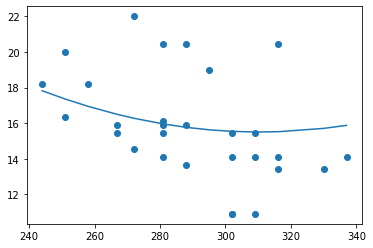

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### Κωδικοποίηση ποικιλιών

Στον ιδανικό κόσμο, θέλουμε να μπορούμε να προβλέψουμε τις τιμές για διαφορετικές ποικιλίες κολοκύθας χρησιμοποιώντας το ίδιο μοντέλο. Για να λάβουμε υπόψη την ποικιλία, πρέπει πρώτα να τη μετατρέψουμε σε αριθμητική μορφή, ή αλλιώς να την **κωδικοποιήσουμε**. Υπάρχουν διάφοροι τρόποι να το κάνουμε:

* Απλή αριθμητική κωδικοποίηση, η οποία δημιουργεί έναν πίνακα με τις διαφορετικές ποικιλίες και στη συνέχεια αντικαθιστά το όνομα της ποικιλίας με έναν δείκτη σε αυτόν τον πίνακα. Αυτό δεν είναι η καλύτερη ιδέα για γραμμική παλινδρόμηση, επειδή η γραμμική παλινδρόμηση λαμβάνει υπόψη την αριθμητική τιμή του δείκτη, και η αριθμητική τιμή πιθανότατα δεν συσχετίζεται αριθμητικά με την τιμή.
* Κωδικοποίηση one-hot, η οποία αντικαθιστά τη στήλη `Variety` με 4 διαφορετικές στήλες, μία για κάθε ποικιλία, που θα περιέχει 1 αν η αντίστοιχη γραμμή ανήκει στη συγκεκριμένη ποικιλία, και 0 διαφορετικά.

Ο παρακάτω κώδικας δείχνει πώς μπορούμε να κωδικοποιήσουμε μια ποικιλία με τη μέθοδο one-hot:


In [181]:
pd.get_dummies(new_pumpkins['Variety'])

FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70            0          0                         0         1
71            0          0                         0         1
72            0          0                         0         1
73            0          0                         0         1
74            0          0                         0         1
...         ...        ...                       ...       ...
1738          0          1                         0         0
1739          0          1                         0         0
1740          0          1                         0         0
1741          0          1                         0         0
1742          0          1                         0         0

[415 rows x 4 columns]

### Γραμμική Παλινδρόμηση στη Ποικιλία

Τώρα θα χρησιμοποιήσουμε τον ίδιο κώδικα όπως παραπάνω, αλλά αντί για `DayOfYear` θα χρησιμοποιήσουμε την ποικιλία μας, η οποία έχει κωδικοποιηθεί με one-hot, ως είσοδο:


In [182]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [183]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


Μπορούμε επίσης να δοκιμάσουμε να χρησιμοποιήσουμε άλλες δυνατότητες με τον ίδιο τρόπο και να τις συνδυάσουμε με αριθμητικές δυνατότητες, όπως το `Month` ή το `DayOfYear`:


In [184]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401096672643048


### Πολυωνυμική Παλινδρόμηση

Η πολυωνυμική παλινδρόμηση μπορεί επίσης να χρησιμοποιηθεί με κατηγορικά χαρακτηριστικά που έχουν κωδικοποιηθεί με one-hot encoding. Ο κώδικας για την εκπαίδευση πολυωνυμικής παλινδρόμησης θα είναι ουσιαστικά ο ίδιος με αυτόν που έχουμε δει παραπάνω.


In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.25%)
Model determination:  0.9652870784724543



---

**Αποποίηση ευθύνης**:  
Αυτό το έγγραφο έχει μεταφραστεί χρησιμοποιώντας την υπηρεσία αυτόματης μετάφρασης [Co-op Translator](https://github.com/Azure/co-op-translator). Παρόλο που καταβάλλουμε προσπάθειες για ακρίβεια, παρακαλούμε να έχετε υπόψη ότι οι αυτόματες μεταφράσεις ενδέχεται να περιέχουν σφάλματα ή ανακρίβειες. Το πρωτότυπο έγγραφο στη μητρική του γλώσσα θα πρέπει να θεωρείται η αυθεντική πηγή. Για κρίσιμες πληροφορίες, συνιστάται επαγγελματική ανθρώπινη μετάφραση. Δεν φέρουμε ευθύνη για τυχόν παρεξηγήσεις ή εσφαλμένες ερμηνείες που προκύπτουν από τη χρήση αυτής της μετάφρασης.
